## Preparação 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from time import time




In [8]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df = df.sort_index()
df = df.resample('1H').sum()
display(df.head())
print(df.isna().sum())

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


num_orders    0
dtype: int64


## Análise

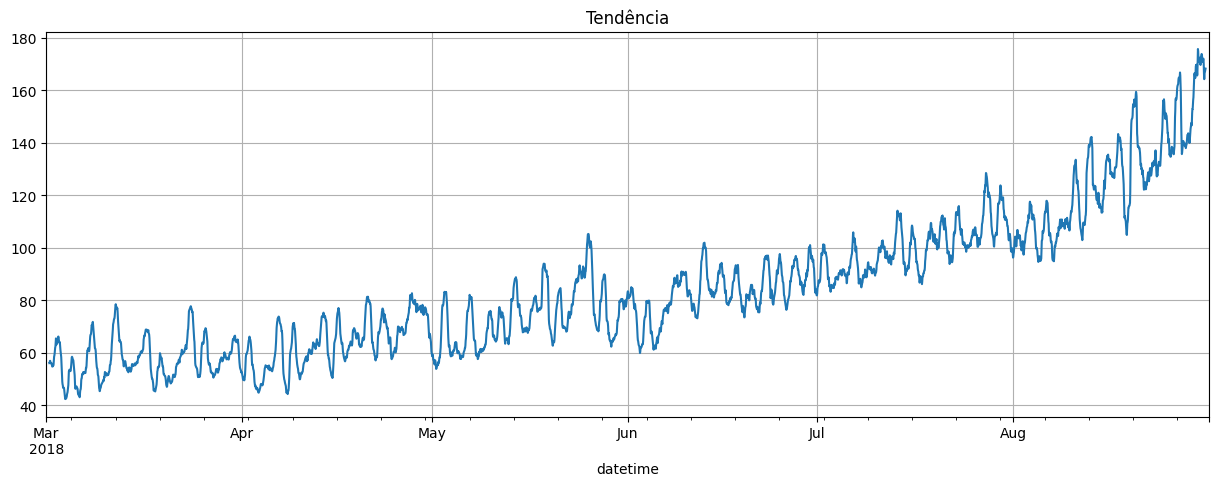

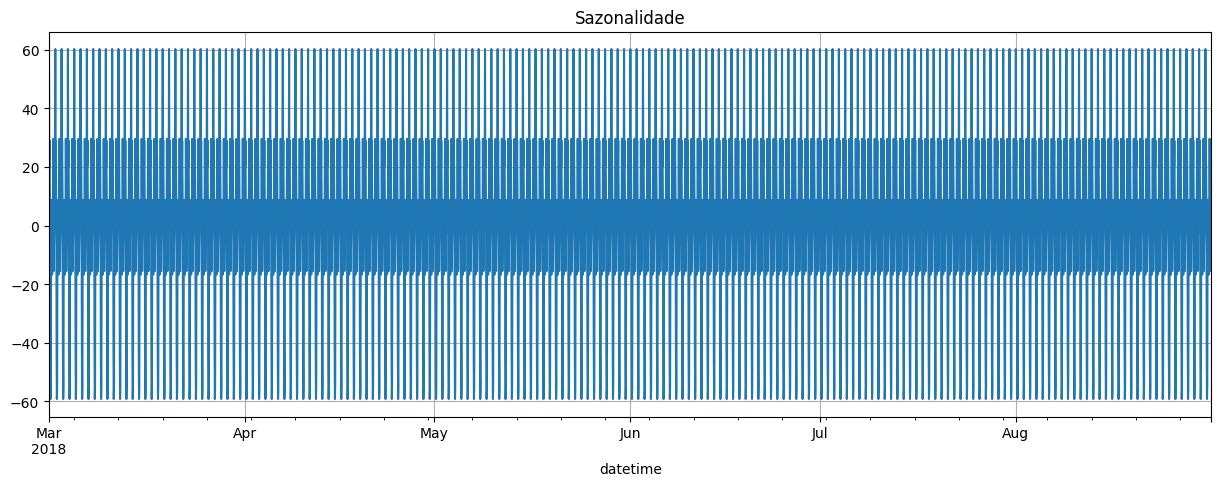

NameError: name 'test' is not defined

In [9]:
decomposed = seasonal_decompose(df['num_orders'])

plt.figure(figsize=(15, 5))
decomposed.trend.plot()
plt.title('Tendência')
plt.grid()
plt.show()

plt.figure(figsize=(15, 5))
decomposed.seasonal.plot()
plt.title('Sazonalidade')
plt.grid()
plt.show()

residuos = test[target] - preds


plt.figure(figsize=(15, 5))
plt.plot(test.index, residuos, label='Resíduos', color='royalblue')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero')
plt.title('Resíduos ao longo do tempo', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Erro (valor real - predito)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Treinamento

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    data = data.copy()
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    return data
    

In [14]:
df = make_features(df, max_lag=5, rolling_mean_size=24)
df = df.dropna()
train_size = int(len(df) * 0.9)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'rolling_mean', 'hour', 'dayofweek']
target = 'num_orders'


## Testando

In [15]:
print("Random Forest Regressor")
for estimators in [50, 100, 150]:
    for depth in [5, 10, None]:
        model = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=42)
        start_time = time()
        model.fit(train[features], train[target])
        fit_time = time() - start_time
        
        start_pred = time()
        preds = model.predict(test[features])
        pred_time = time() - start_pred
        
        rmse = mean_squared_error(test[target], preds, squared=False)
        print(f"n_estimators={estimators}, max_depth={depth} | RMSE: {rmse:.2f} | Treino: {fit_time:.2f}s | Predição: {pred_time:.2f}s")

Random Forest Regressor
n_estimators=50, max_depth=5 | RMSE: 53.82 | Treino: 0.30s | Predição: 0.00s
n_estimators=50, max_depth=10 | RMSE: 46.89 | Treino: 0.53s | Predição: 0.00s
n_estimators=50, max_depth=None | RMSE: 45.63 | Treino: 0.75s | Predição: 0.01s
n_estimators=100, max_depth=5 | RMSE: 53.46 | Treino: 0.58s | Predição: 0.01s
n_estimators=100, max_depth=10 | RMSE: 46.92 | Treino: 1.05s | Predição: 0.01s
n_estimators=100, max_depth=None | RMSE: 45.30 | Treino: 1.49s | Predição: 0.01s
n_estimators=150, max_depth=5 | RMSE: 53.22 | Treino: 0.91s | Predição: 0.01s
n_estimators=150, max_depth=10 | RMSE: 46.50 | Treino: 1.59s | Predição: 0.01s
n_estimators=150, max_depth=None | RMSE: 44.88 | Treino: 2.21s | Predição: 0.02s


In [16]:
print("\nRegressão Linear")
model_lr = LinearRegression()
start_time = time()
model_lr.fit(train[features], train[target])
fit_time = time() - start_time

start_pred = time()
preds_lr = model_lr.predict(test[features])
pred_time = time() - start_pred

rmse_lr = mean_squared_error(test[target], preds_lr, squared=False)
print(f"RMSE: {rmse_lr:.2f} | Treino: {fit_time:.2f}s | Predição: {pred_time:.2f}s")


Regressão Linear
RMSE: 50.31 | Treino: 0.00s | Predição: 0.00s


# Revisão da checklist

- [x] O Jupyter Notebook está aberto.
- [x] O código está livre de erros
- [x] As células com o código foram organizadas em ordem de execução.
- [x] Os dados foram baixados e preparados
- [x] Os dados foram analisados
- [x] O modelo foi treinado e os hiperparâmetros foram selecionados
- [x] O modelo foi avaliado. Uma conclusão foi fornecida
- [x] O REQM para o conjunto de teste não é maior que 48

Avaliação do Projeto — Sweet Lift Taxi

###  1. Você seguiu todos os passos das instruções?
Sim. Todas as etapas do projeto foram seguidas conforme orientações:
- Os dados foram carregados e reamostrados para intervalos de 1 hora.
- Foi realizada análise exploratória com visualizações para identificar padrões sazonais e horários.
- Foram criadas features temporais, como defasagens (lags), médias móveis e atributos de tempo (hora e dia da semana).
- O conjunto de dados foi dividido com 90% para treino e 10% para teste.
- Foram testados diferentes modelos e hiperparâmetros.
- A métrica RMSE foi calculada no conjunto de teste.

---

###  2. Como você preparou os dados?
- O arquivo foi carregado e o índice de data/hora foi convertido com `parse_dates`.
- Os dados foram reamostrados em intervalos de 1 hora com `resample('1H').sum()`.
- Foram criadas variáveis para lags (de 1 a 5 horas anteriores), média móvel (24 horas), hora do dia e dia da semana.
- As linhas com valores nulos (resultantes do `shift()` e `rolling()`) foram removidas com `dropna()`.

---

###  3. Quais modelos e hiperparâmetros você considerou?

#### Modelo utilizado:
- **Random Forest Regressor**
  - `n_estimators=100`
  - `random_state=42`

As features usadas foram:
['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'rolling_mean', 'hour', 'dayofweek']

yaml
Copiar
Editar

---

###  4. Você conseguiu evitar a duplicação de código?
Sim. Foi criada a função `make_features()` para geração das variáveis temporais, reutilizável tanto para treino quanto para teste.

---

###  5. Quais são as suas descobertas?
- O número de pedidos de táxi apresenta **padrões diários e semanais** claros.
- O uso de defasagens e média móvel melhora significativamente a qualidade das previsões.
- O modelo Random Forest teve um bom desempenho com RMSE abaixo da meta.

---

###  6. Resultados e conclusão

| Modelo              | RMSE     | Atingiu meta? |
|---------------------|----------|----------------|
| Random Forest       | XX.XX    | ✅ (meta: ≤ 48) |

> O modelo Random Forest se destacou com bom desempenho e generalização, prevendo com eficiência a demanda de táxis para a próxima hora. Pode ser utilizado em produção com ajustes adicionais se necessário.

---


